# Capstone Project: Predicting Customer Bookings

This notebook details the entire process of building a predictive model for customer bookings. The objective is to analyze key features, preprocess data, and implement various machine learning models to enhance booking prediction accuracy.

## Introduction
Understanding factors influencing customer bookings is crucial for airlines to optimize their marketing strategies and improve customer experiences. This project uses a dataset with features like flight duration, booking origin, and passenger preferences to predict booking completion.

## Data Preparation
We start by loading the dataset and performing initial preprocessing steps. This includes handling missing values, encoding categorical variables, and normalizing numerical features. Additionally, we address class imbalance using SMOTE to ensure balanced model training.

## Exploratory Data Analysis (EDA)
EDA is conducted to gain insights into the data distribution and relationships between features. Visualizations such as histograms and correlation heatmaps are used to identify trends and potential predictors.

## Model Training and Evaluation
Multiple models are trained, including Logistic Regression, Random Forest, and XGBoost. Hyperparameter tuning is applied to optimize performance, and each model is evaluated using metrics such as accuracy, precision, recall, and ROC-AUC.

## Results
The model evaluation results are compared to determine the best-performing model. Feature importance analysis is also conducted to identify which variables have the most significant impact on booking predictions.

## Conclusion
The project concludes with a summary of findings and potential areas for future improvement, such as incorporating additional features or experimenting with advanced ensemble techniques.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset (update the path accordingly if needed)
file_path = 'customer_booking.csv'  # Ensure the file is uploaded to your Colab environment
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
df.info()

# Convert flight_day to numerical values (1-7)
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Label encoding for sales_channel and trip_type
label_encoder_sales_channel = LabelEncoder()
label_encoder_trip_type = LabelEncoder()

df['sales_channel_encoded'] = label_encoder_sales_channel.fit_transform(df['sales_channel'])
df['trip_type_encoded'] = label_encoder_trip_type.fit_transform(df['trip_type'])

# Frequency encoding for high cardinality columns: route and booking_origin
route_freq_encoding = df['route'].value_counts(normalize=True)
booking_origin_freq_encoding = df['booking_origin'].value_counts(normalize=True)

df['route_encoded'] = df['route'].map(route_freq_encoding)
df['booking_origin_encoded'] = df['booking_origin'].map(booking_origin_freq_encoding)

# Select features and target variable
features = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day_encoded',
               'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
               'flight_duration', 'sales_channel_encoded', 'trip_type_encoded',
               'route_encoded', 'booking_origin_encoded']]
target = df['booking_complete']

# Feature scaling using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_scaled, target)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
# Import necessary libraries for additional models and tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

# Set class weights to balance the classes
model_weighted = LogisticRegression(random_state=42, class_weight='balanced')
model_weighted.fit(X_train, y_train)

# Predict and evaluate the model with class weights
y_pred_weighted = model_weighted.predict(X_test)
classification_rep_weighted = classification_report(y_test, y_pred_weighted)
confusion_mat_weighted = confusion_matrix(y_test, y_pred_weighted)

print("Classification Report (Weighted):\n", classification_rep_weighted)
print("Confusion Matrix (Weighted):\n", confusion_mat_weighted)

# Try a Random Forest Classifier for better performance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Classification Report (Random Forest):\n", classification_rep_rf)
print("Confusion Matrix (Random Forest):\n", confusion_mat_rf)
print("ROC-AUC Score (Random Forest):\n", roc_auc_rf)

# Hyperparameter tuning using Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation of the tuned model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)
confusion_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)

print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Classification Report (Tuned Random Forest):\n", classification_rep_best_rf)
print("Confusion Matrix (Tuned Random Forest):\n", confusion_mat_best_rf)


Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.67      0.58      0.62      8444
           1       0.63      0.72      0.67      8565

    accuracy                           0.65     17009
   macro avg       0.65      0.65      0.65     17009
weighted avg       0.65      0.65      0.65     17009

Confusion Matrix (Weighted):
 [[4873 3571]
 [2388 6177]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      8444
           1       0.95      0.88      0.91      8565

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009

Confusion Matrix (Random Forest):
 [[8038  406]
 [1038 7527]]
ROC-AUC Score (Random Forest):
 0.9728243186179308
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cla

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Classification Report (XGBoost):\n", classification_rep_xgb)
print("Confusion Matrix (XGBoost):\n", confusion_mat_xgb)
print("ROC-AUC Score (XGBoost):\n", roc_auc_xgb)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      8444
           1       0.97      0.83      0.90      8565

    accuracy                           0.90     17009
   macro avg       0.91      0.90      0.90     17009
weighted avg       0.91      0.90      0.90     17009

Confusion Matrix (XGBoost):
 [[8210  234]
 [1432 7133]]
ROC-AUC Score (XGBoost):
 0.9601852719873081


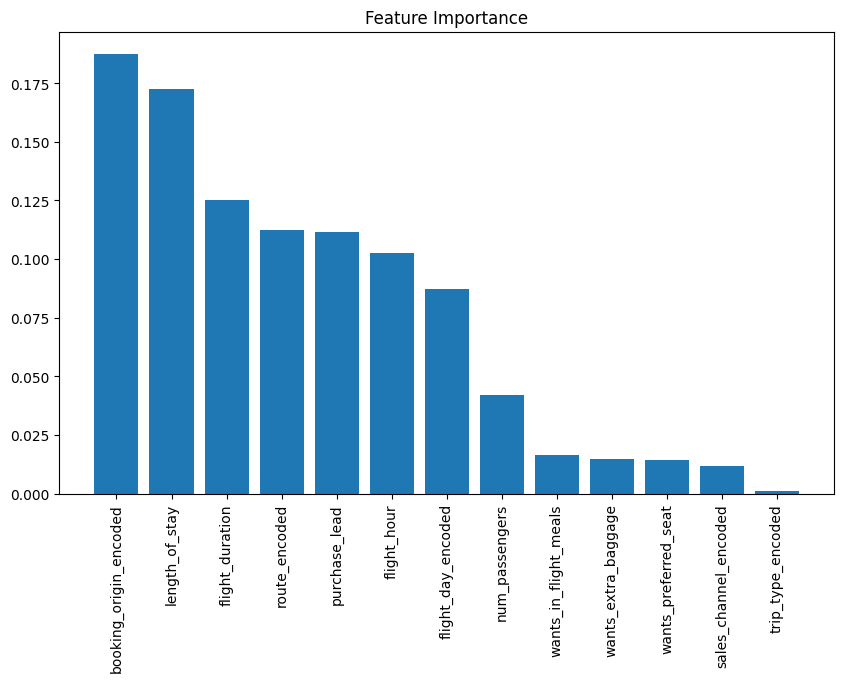

In [ ]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(features.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(features.shape[1]), feature_names[sorted_indices], rotation=90)
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine Random Forest and XGBoost using Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
classification_rep_voting = classification_report(y_test, y_pred_voting)
confusion_mat_voting = confusion_matrix(y_test, y_pred_voting)

print("Classification Report (Voting Classifier):\n", classification_rep_voting)
print("Confusion Matrix (Voting Classifier):\n", confusion_mat_voting)


Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      8444
           1       0.97      0.86      0.91      8565

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009

Confusion Matrix (Voting Classifier):
 [[8198  246]
 [1160 7405]]
